# Practice to rewrite the formulas in this paper
Imaging surface analysis: Lateral resolution and its relation to contrast and
noise

Mathias Senoner,* Thomas Wirth and Wolfgang E. S. Unger
Received 16th March 2010, Accepted 13th May 2010
DOI: 10.1039/c004323k

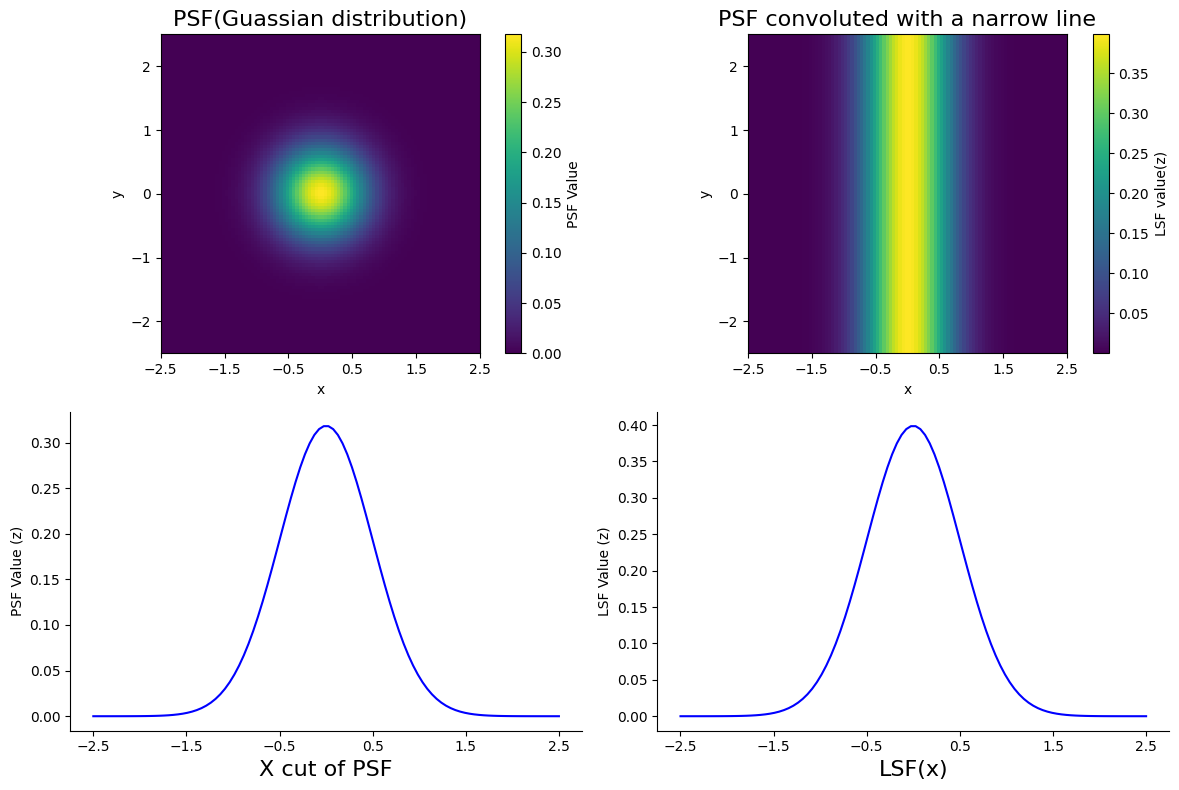

In [32]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Guassian distribution
def PSF_Guassian(x, y, sigma):
    result = np.exp(-(np.power(x, 2) + np.power(y, 2)) / (2 * np.power(sigma, 2))) / 2 / np.pi / np.sqrt(np.power(sigma, 2))
    return result

# integraded function (use scipy)
def LSF_Guassian(x, sigma):
    result, error = quad(lambda y: PSF_Guassian(x, y, sigma), -np.inf, np.inf)
    return result

# Set image size
side_length = 5 
data_amount_in_one_axes = 100

x = np.linspace(-side_length/2, side_length/2, data_amount_in_one_axes)  
y = np.linspace(-side_length/2, side_length/2, data_amount_in_one_axes)  
X, Y = np.meshgrid(x, y)

# start to plot figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
sigma = 0.5

# ax1: PSF's 2D image
# Count z value of each point
Z = PSF_Guassian(X, Y, sigma)
# Plot figure
im = ax1.imshow(Z, extent=(-side_length/2, side_length/2, -side_length/2, side_length/2), origin='lower', cmap='viridis')
fig.colorbar(im, ax=ax1, label="PSF Value")
ax1.set_title("PSF(Guassian distribution)", fontsize=16)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xticks(np.arange(-side_length/2, side_length/2 + 1, 1)) 

# ax2: PSF convoluted with a narrow line
# Count integraded_y
Z_integrated_y = np.array([LSF_Guassian(xi, sigma) for xi in x])
Z_integrated_y = np.tile(Z_integrated_y, (100, 1)) 
# Plot figure
im2 = ax2.imshow(Z_integrated_y, extent=(-side_length/2, side_length/2, -side_length/2, side_length/2), origin='lower', cmap='viridis')
fig.colorbar(im2, ax=ax2, label="LSF value(z)")
ax2.set_title("PSF convoluted with a narrow line", fontsize=16)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xticks(np.arange(-side_length/2, side_length/2 + 1, 1)) 

# ax3: x cut of PSF (at y = 0)
# x cut of PSF (at y = 0)
z_slice = PSF_Guassian(x, 0, sigma)
# Plot figure
ax3.plot(x, z_slice, color='blue')
ax3.set_xlabel("X cut of PSF", fontsize=16)
ax3.set_ylabel("PSF Value (z)")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xticks(np.arange(-side_length/2, side_length/2 + 1, 1)) 

# ax4: LSF(x)（y=0）
Z_integrated_y_slice = np.array([LSF_Guassian(xi, sigma) for xi in x])
# Plot figure
ax4.plot(x, Z_integrated_y_slice, color='blue')
ax4.set_xlabel("LSF(x)", fontsize=16)
ax4.set_ylabel("LSF Value (z)")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xticks(np.arange(-side_length/2, side_length/2 + 1, 1)) 

plt.tight_layout()
plt.show()

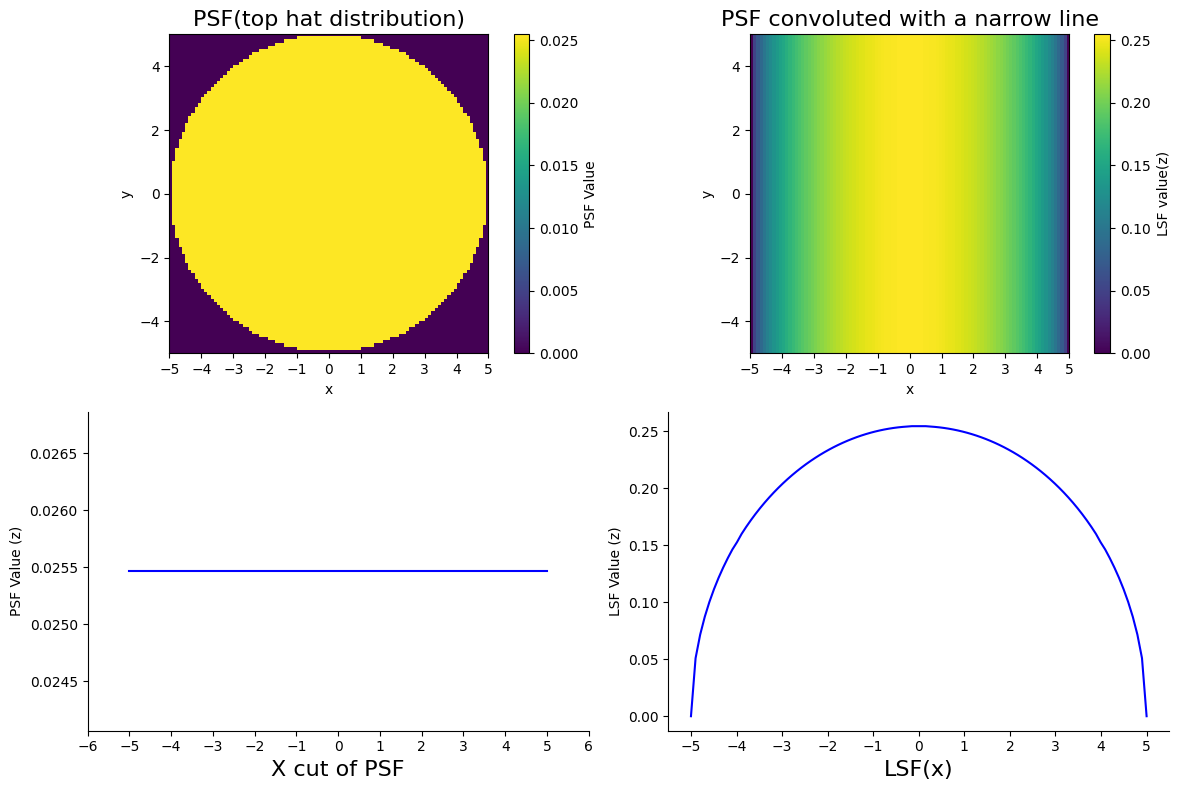

In [54]:
# top hat distribution
def PSF_top_hat(x, y):
    Z = np.where((x**2 + y**2) <= r**2, 1 / (np.pi * r**2 / 2), 0)
    return Z

# integraded function (use scipy)
def LSF_top_hat(x):
    result, error = quad(lambda y: PSF_top_hat(x, y), -np.inf, np.inf)
    return result

# Set image size
r = 5 
data_amount_in_one_axes = 100

x = np.linspace(-r, r, data_amount_in_one_axes)  
y = np.linspace(-r, r, data_amount_in_one_axes)  
X, Y = np.meshgrid(x, y)

# start to plot figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
sigma = 0.5

# ax1: PSF's 2D image
# Count z value of each point
Z = PSF_top_hat(X, Y)
# Plot figure
im = ax1.imshow(Z, extent=(-r, r, -r, r), origin='lower', cmap='viridis')
fig.colorbar(im, ax=ax1, label="PSF Value")
ax1.set_title("PSF(top hat distribution)", fontsize=16)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xticks(np.arange(-r, r + 1, 1)) 

# ax2: PSF convoluted with a narrow line
# Count integraded_y
Z_integrated_y = np.array([LSF_top_hat(xi) for xi in x])
Z_integrated_y = np.tile(Z_integrated_y, (100, 1)) 
# Plot figure
im2 = ax2.imshow(Z_integrated_y, extent=(-r, r, -r, r), origin='lower', cmap='viridis')
fig.colorbar(im2, ax=ax2, label="LSF value(z)")
ax2.set_title("PSF convoluted with a narrow line", fontsize=16)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xticks(np.arange(-r, r + 1, 1)) 

# ax3: x cut of PSF (at y = 0)
# x cut of PSF (at y = 0)
z_slice = PSF_top_hat(x, 0)
# Plot figure
ax3.plot(x, z_slice, color='blue')
ax3.set_xlabel("X cut of PSF", fontsize=16)
ax3.set_ylabel("PSF Value (z)")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xticks(np.arange(-r - 1, r + 2, 1)) 

# ax4: LSF(x)（y=0）
Z_integrated_y_slice = np.array([LSF_top_hat(xi) for xi in x])
# Plot figure
ax4.plot(x, Z_integrated_y_slice, color='blue')
ax4.set_xlabel("LSF(x)", fontsize=16)
ax4.set_ylabel("LSF Value (z)")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xticks(np.arange(-r, r + 1, 1)) 

plt.tight_layout()
plt.show()